In [40]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.model_selection import train_test_split

In [41]:
digits = datasets.load_digits()
n_samples = len(digits.images)

print(n_samples)
digits

1797


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [42]:
data = digits.images.reshape((n_samples, -1))

print(len(data)) # 1797 samples
print(len(data[0])) # each image is 8x8
data

1797
64


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [52]:
# train the model and run our predictions

#classifier = svm.SVC(gamma=0.001)
classifier = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

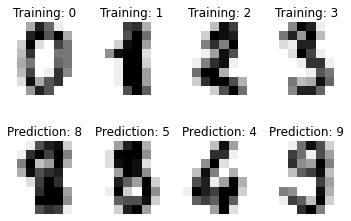

In [53]:
# display the first 4 images

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# display 4 of our predictions    

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

Classification report for classifier SGDClassifier():
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.77      0.90      0.83        91
           2       1.00      0.98      0.99        86
           3       0.96      0.84      0.89        91
           4       0.99      0.91      0.95        92
           5       0.83      0.93      0.88        91
           6       0.93      0.99      0.96        91
           7       0.98      0.91      0.94        89
           8       0.93      0.78      0.85        88
           9       0.83      0.93      0.88        92

    accuracy                           0.91       899
   macro avg       0.92      0.91      0.91       899
weighted avg       0.92      0.91      0.91       899


Confusion matrix:
[[83  0  0  0  1  2  2  0  0  0]
 [ 0 82  0  1  0  0  1  0  1  6]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  2  0 76  0  7  0  2  3  1]
 [ 1  2  0  0 84  0  3  0  0  2]
 [ 

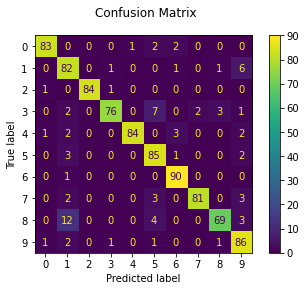

In [54]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()